In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../_mypractice/datasets/Market_Basket_Optimisation.csv")

In [3]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
transactions = df.stack().groupby(level=0).apply(list).tolist()

In [5]:
print(transactions[0])

['burgers', 'meatballs', 'eggs']


In [6]:
print(transactions[1])

['chutney']


In [7]:
from mlxtend.preprocessing import TransactionEncoder

In [8]:
te = TransactionEncoder()

In [9]:
te_ary = te.fit(transactions).transform(transactions)

In [10]:
te_ary.shape

(7500, 120)

In [11]:
df = pd.DataFrame(te_ary, columns = te.columns_)

In [12]:
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
from mlxtend.frequent_patterns import apriori, association_rules


frequent = apriori(df,min_support = 0.01, use_colnames=True)

In [14]:
rules = association_rules(frequent, metric='lift')
print(rules[['antecedents','consequents','support','confidence','lift']])

                   antecedents                 consequents   support  \
0                    (avocado)             (mineral water)  0.011467   
1              (mineral water)                   (avocado)  0.011467   
2                    (burgers)                      (cake)  0.011467   
3                       (cake)                   (burgers)  0.011467   
4                    (burgers)                 (chocolate)  0.017067   
..                         ...                         ...       ...   
425  (mineral water, pancakes)                 (spaghetti)  0.011467   
426      (spaghetti, pancakes)             (mineral water)  0.011467   
427            (mineral water)       (spaghetti, pancakes)  0.011467   
428                (spaghetti)   (mineral water, pancakes)  0.011467   
429                 (pancakes)  (mineral water, spaghetti)  0.011467   

     confidence      lift  
0      0.345382  1.449559  
1      0.048125  1.449559  
2      0.131498  1.622103  
3      0.141447  1.6221

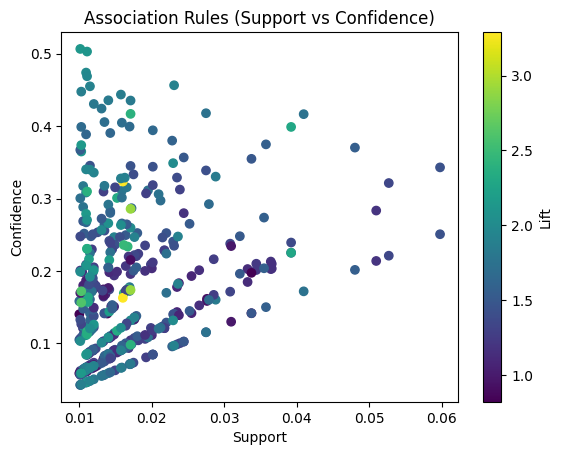

In [20]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules (Support vs Confidence)')
plt.show()